In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

color_map = {
    "Recovery Achieved": "#2ca02c",   # green
    "Not Achieved": "#ff7f0e",         # orange
    "Delay Worsened": "#d62728"        # red
}


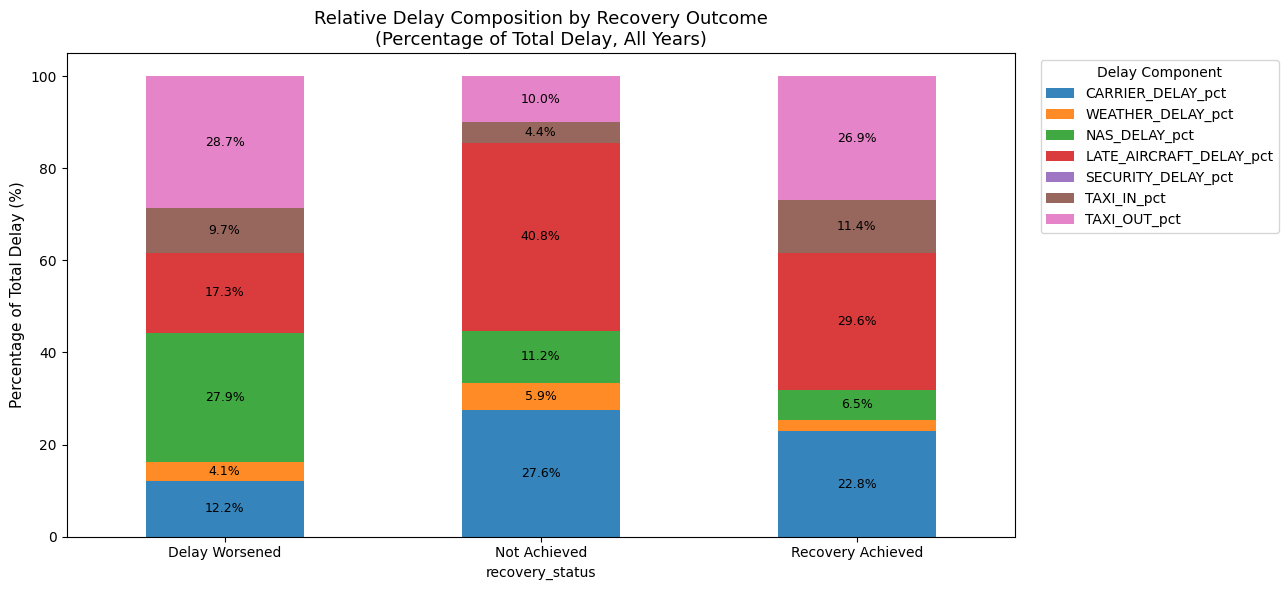

<Figure size 640x480 with 0 Axes>

In [2]:
df_pct = pd.read_csv("final_exports/agg_all_percent.csv")
df_pct = df_pct.set_index("recovery_status")

fig, ax = plt.subplots(figsize=(13,6))

df_pct.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    alpha=0.9
)

for container in ax.containers:
    labels = [
        f"{v:.1f}%" if v > 4 else "" 
        for v in container.datavalues
    ]
    ax.bar_label(
        container,
        labels=labels,
        label_type="center",
        fontsize=9
    )

ax.set_ylabel("Percentage of Total Delay (%)", fontsize=11)
ax.set_title(
    "Relative Delay Composition by Recovery Outcome\n(Percentage of Total Delay, All Years)",
    fontsize=13
)

ax.set_xticklabels(df_pct.index, rotation=0)

ax.legend(
    title="Delay Component",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()
plt.savefig("plots/agg_all_percent.png")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


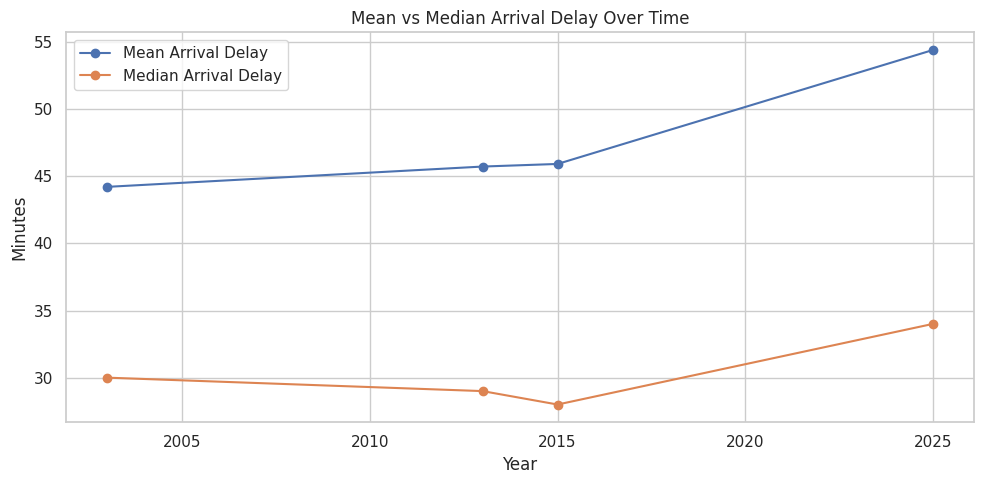

<Figure size 640x480 with 0 Axes>

In [4]:
df = pd.read_csv("final_exports/yearly_summary.csv")
#Are delays longer? Are they more common?
plt.figure(figsize=(10,5))
plt.plot(df["YEAR"], df["mean_arr"], marker="o", label="Mean Arrival Delay")
plt.plot(df["YEAR"], df["median_arr"], marker="o", label="Median Arrival Delay")

plt.xlabel("Year")
plt.ylabel("Minutes")
plt.title("Mean vs Median Arrival Delay Over Time")
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("plots/yearly_summary.png")
#mean increases but median doesnt increase by a lot so middle values arent influencing the mean, a few late flights are pulling the vaerage up

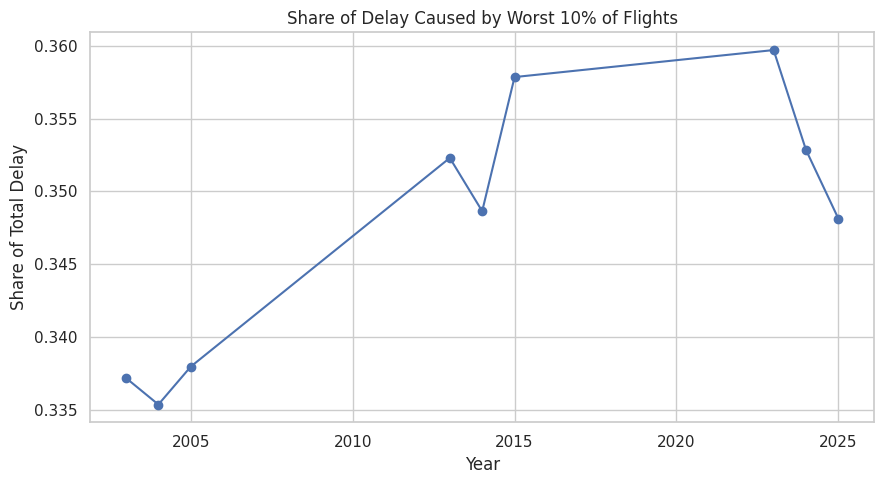

<Figure size 640x480 with 0 Axes>

In [5]:
#are delays increasingly driven by extreme events

df = pd.read_csv("final_exports/unevenness.csv")

plt.figure(figsize=(9,5))
plt.plot(df["YEAR"], df["top10_delay_share"], marker="o")

plt.xlabel("Year")
plt.ylabel("Share of Total Delay")
plt.title("Share of Delay Caused by Worst 10% of Flights")
plt.tight_layout()
plt.show()
plt.savefig("plots/unevenness.png")

#worst 10% of flights in each year

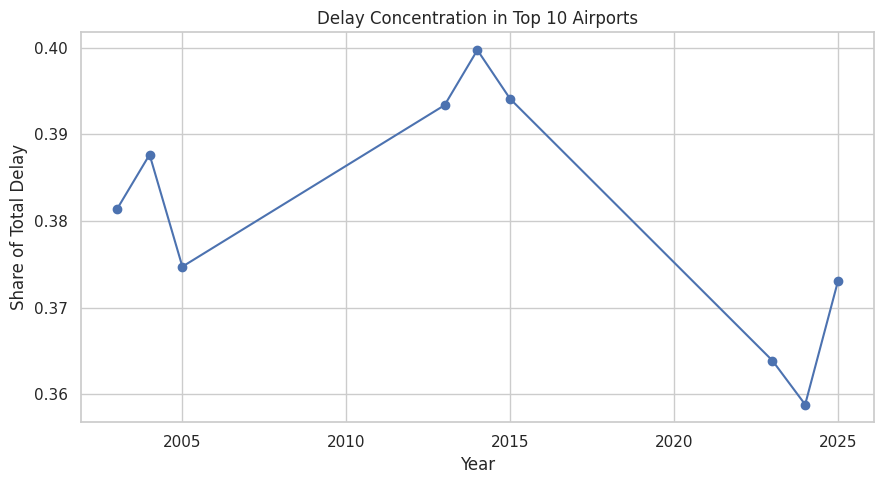

<Figure size 640x480 with 0 Axes>

In [6]:
df = pd.read_csv("exports/airport_concentration.csv")
#Are delays becoming localized in bottleneck airports?
plt.figure(figsize=(9,5))
plt.plot(df["YEAR"], df["top10_airport_delay_share"], marker="o")

plt.xlabel("Year")
plt.ylabel("Share of Total Delay")
plt.title("Delay Concentration in Top 10 Airports")
plt.tight_layout()
plt.show()
plt.savefig("plots/airport_concentration.png")

#fraction of delay caused by top 10 airports these have more influence and their influence decreases

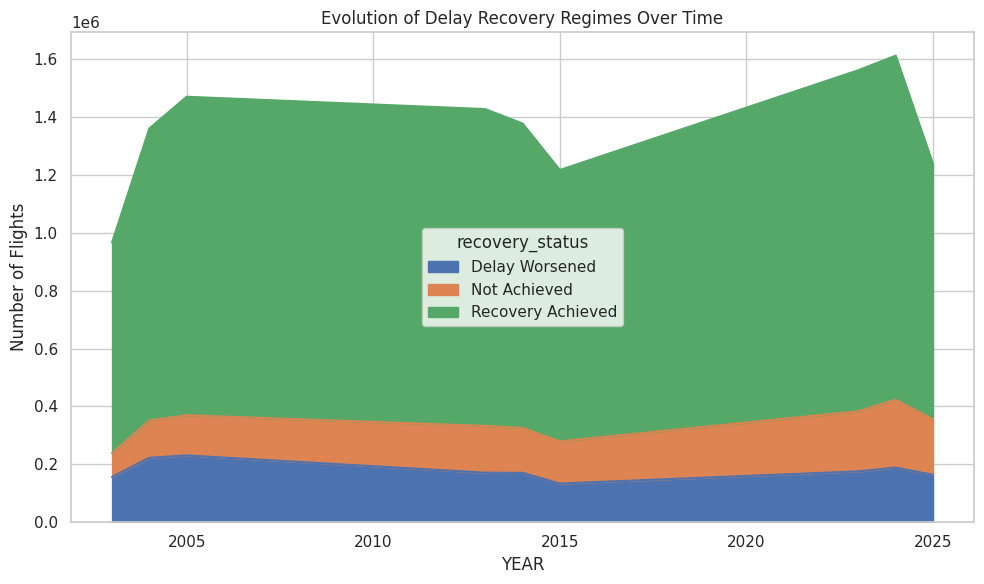

<Figure size 640x480 with 0 Axes>

In [7]:
df = pd.read_csv("final_exports/recovery_regimes.csv")

pivot = df.pivot(index="YEAR", columns="recovery_status", values="count")
pivot.plot(kind="area", stacked=True, figsize=(10,6))

plt.ylabel("Number of Flights")
plt.title("Evolution of Delay Recovery Regimes Over Time")
plt.tight_layout()
plt.show()
plt.savefig("plots/recovery_regimes.png")

#Are delay spirals becoming more common than recoveries?

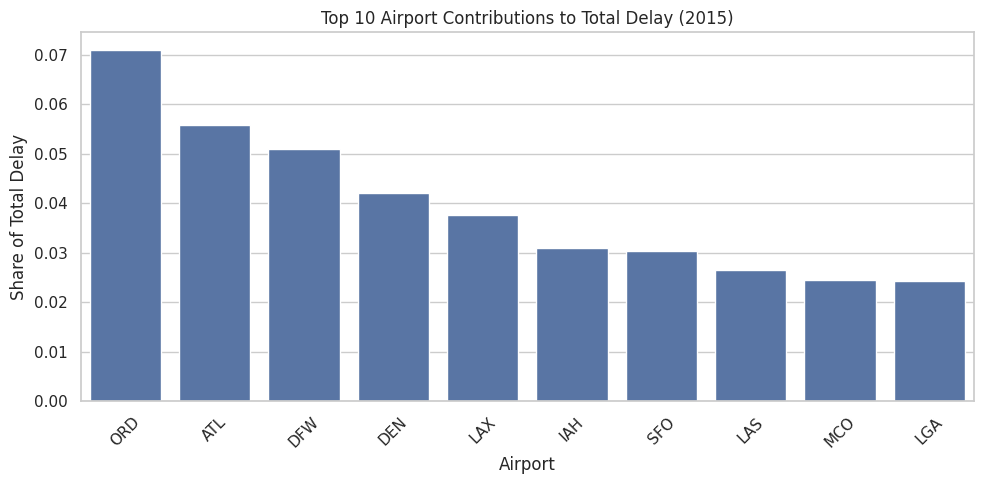

In [8]:
df = pd.read_csv("final_exports/airport_contribution.csv")
year = 2015
df_y = df[df["YEAR"] == year]

plt.figure(figsize=(10,5))
sns.barplot(
    data=df_y,
    x="ORIGIN",
    y="delay_share"
)

plt.ylabel("Share of Total Delay")
plt.xlabel("Airport")
plt.title(f"Top 10 Airport Contributions to Total Delay ({year})")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




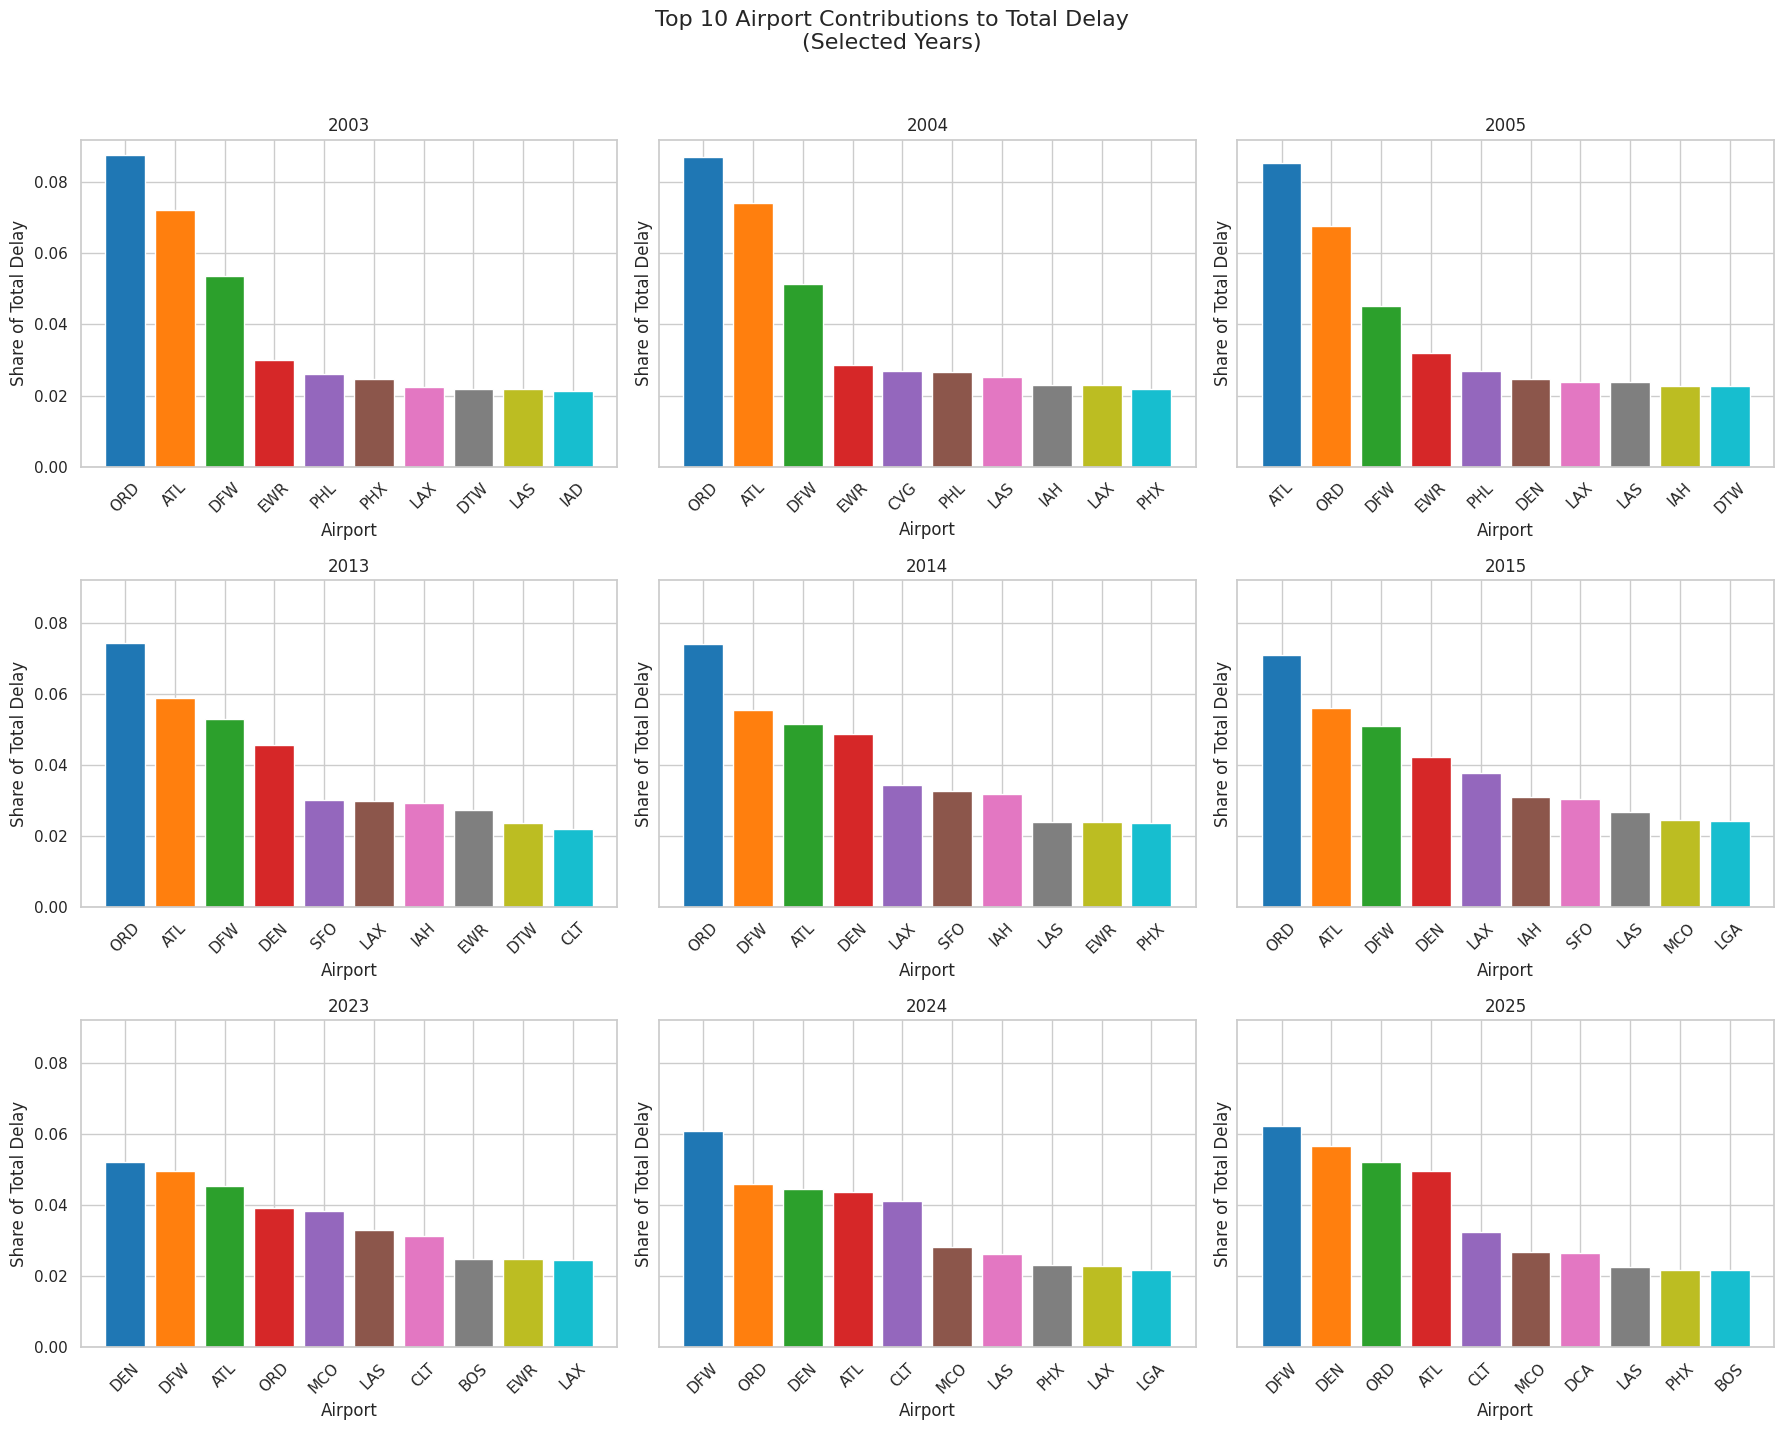

<Figure size 640x480 with 0 Axes>

In [9]:
df = pd.read_csv("final_exports/airport_contribution_selected_years.csv")
years = [2003, 2004, 2005, 2013, 2014, 2015, 2023, 2024, 2025]

fig, axes = plt.subplots(3, 3, figsize=(18, 14), sharey=True)
axes = axes.flatten()

for ax, year in zip(axes, years):
    df_y = df[df["YEAR"] == year].sort_values("delay_share", ascending=False)

    ax.bar(
        df_y["ORIGIN"],
        df_y["delay_share"],
        color=sns.color_palette("tab10", len(df_y))
    )

    ax.set_title(str(year))
    ax.set_xlabel("Airport")
    ax.set_ylabel("Share of Total Delay")
    ax.tick_params(axis="x", rotation=45)

plt.suptitle(
    "Top 10 Airport Contributions to Total Delay\n(Selected Years)",
    fontsize=16,
    y=1.02
)

plt.tight_layout()
plt.show()
plt.savefig("plots/airport_contribution_selected_years.png")

